# BE 447 PROJECT

### Kaimalie Stensgaard & Spencer Dang

Repository Checklist:
1. Folder for data
2. One Jupyter notebook 
3. One ML model trained and evaluated 
4. A FIGURE PERHAPS???

In [8]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

In [1]:
import pandas as pd

#load the datasets 
fast_food = pd.read_csv("fastfood.csv")
nutrition = pd.read_csv("FastFoodNutritionMenuV2.csv")

fast_food.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [2]:
# Print dataset shape (rows, columns)
print(f"Dataset Shape: {fast_food.shape}")


# Show column names
print(fast_food.columns)

Dataset Shape: (515, 17)
Index(['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar',
       'protein', 'vit_a', 'vit_c', 'calcium', 'salad'],
      dtype='object')


In [3]:
#set up Machine Learning model 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
target_column = "calories" 

X = fast_food.drop(columns=["item", "restaurant", target_column], errors="ignore")  
y = fast_food[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Size: {X_train.shape}, Testing Size: {X_test.shape}")



Training Size: (412, 14), Testing Size: (103, 14)


In [5]:
# what categories within X_train are able to be plugged into RFC
print(X_train.dtypes)

#drop the ʻsaladʻ column from the data set, its either this or convert it to be numerical
X_train = pd.get_dummies(X_train, columns=["salad"], drop_first=True) 
X_test = pd.get_dummies(X_test, columns=["salad"], drop_first=True)

#make it so that the data set columns match
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

cal_fat          int64
total_fat        int64
sat_fat        float64
trans_fat      float64
cholesterol      int64
sodium           int64
total_carb       int64
fiber          float64
sugar            int64
protein        float64
vit_a          float64
vit_c          float64
calcium        float64
salad           object
dtype: object


In [6]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.15


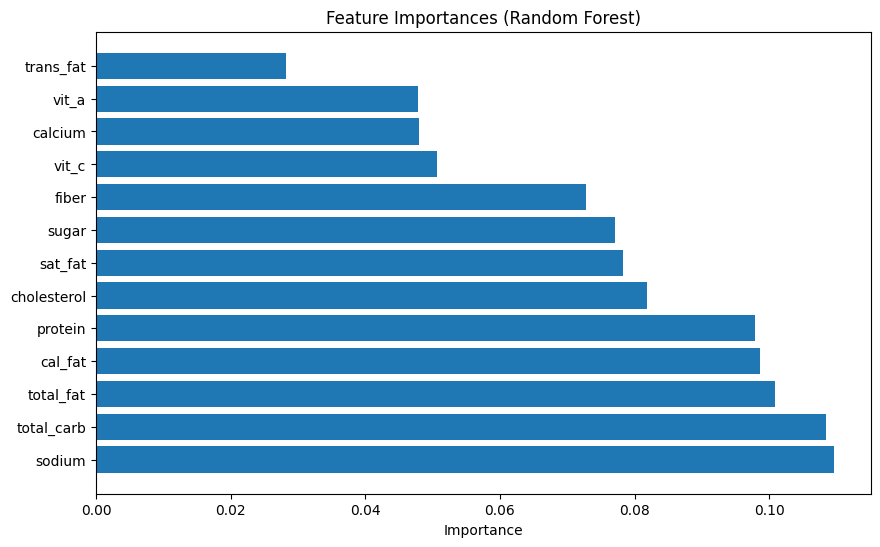

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the trained model
importances = clf.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Importance")
plt.show()